# From Rome to Toronto

## Introduction/Business Problem

Relocating from Rome to Toronto without any knowledge of the city can be difficult.  
Since both are quite large and important cities, neighborhoods within those cities are quite different from each other.  
As an example, a person from Centocelle (Rome) would adjust better in Harbourfront East (Toronto) than in Summerhill East (Toronto), where he/she can enjoy a similar density of restaurants and cinemas;  while Summerhill  may be better for someone from Trastevere (Rome), where he/she can appreciate the green area.  
The purpose of this project is to use Foursquare location data to identify the types of venues within each neighborhood and calculate the "similarity" a roman neighborhood will have to a Toronto neighborhood.
At then end of the project, the person from Rome who needs to relocate will type his/her neighborhood and he/she will be provide with a ranking of the “less distant” Toronto neighborhoods from his/her own.

## Data

 - Canada postcode available at https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M  
     This table associates Canadian Postcodes with Neighbourhoods
 - Canadian postcode latitude and longitude available at http://cocl.us/Geospatial_data
 - Italian postcode latitude and longitude available at http://download.geonames.org/export/zip/  
      Raw data has been pre-filtered for the roman area before importing into pandas
 - Roman neighborhoods available at http://www.roma-o-matic.com/zoom.php3?actions[Z]=x  
      This table associate Roman Neighborhoods with postcodes (CAP in Italian)  
 - Foursquare location data  
     Using the latitude and longitude of both Roman and Toronto Neighbourhoods, I have fetching a max of 100 Venues within a Radius of 500 m. I have used the URL https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={} and re-organised them into a pandas dataframe obtaining one row per venue, with its venue category and the neighbourhoods within it has been found
 

## Methodology section

### Data preparation

The Canada postcode have been cleanse for any neighborhood that was not assigned and grouped together by postcode. Once a single line per postcode has been established, latitude and longitude have been included. Since this dataframe will need to be completed by the roman section, an additional column identifying the city has been added. 

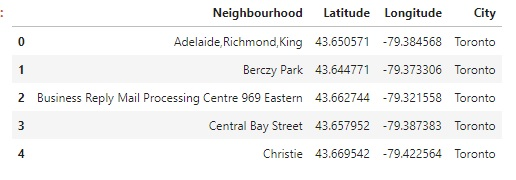

In [9]:
from IPython.display import Image
PATH = "/resources/labs/Data/"
Image(filename = PATH + "im1.jpg", unconfined=True)

Preparing data for Roman neighborhoods has been different, given the different nature of Roman neighborhoods. It is quite possible, for a roman neighborhood, to spread across several postcode. Hence, the latitude and longitude of the postcodes have been group together for each neighborhood by calculating the average. This should give the most central position of each neighborhood.

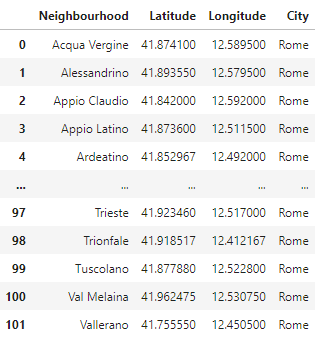

In [11]:
from IPython.display import Image
PATH = "/resources/labs/Data/"
Image(filename = PATH + "im2.png", unconfined=True)

The above two datasets have been appended together in order to fetch a max of 100 Venues within a Radius of 500 m for every neighbourhood.  
Fourtsquare location data has been used for this purpose. Data manipulation has been applied to obtain a dataset with one row per venue, with its venue category and the neighbourhoods within it has been found

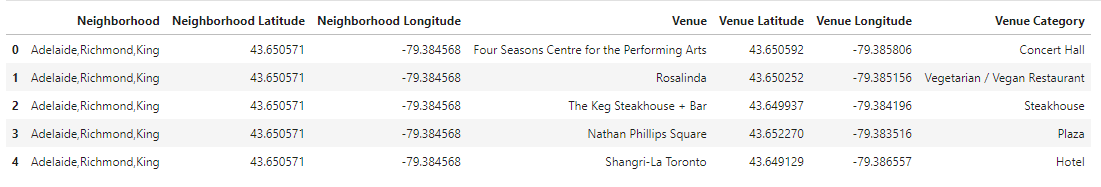

In [13]:
from IPython.display import Image
PATH = "/resources/labs/Data/"
Image(filename = PATH + "im3.png", unconfined=True)

Transposing the above, grouping rows by neighborhood and taking the mean of the frequency of occurrence of each category will produce a dataset ready to be used for numerically identify the similarity across neighbourhoods 

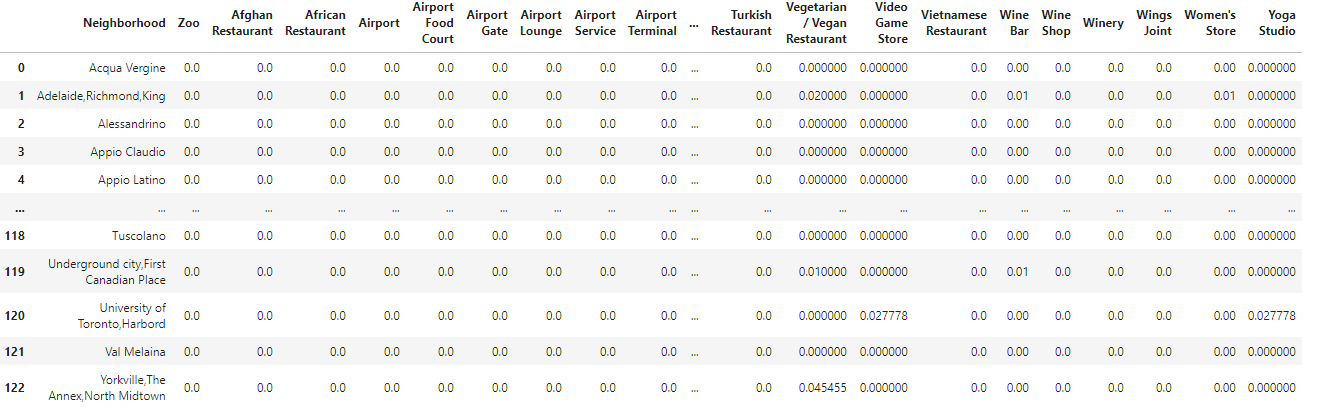

In [2]:
from IPython.display import Image
PATH = "/resources/labs/Data/"
Image(filename = PATH + "im4.png", unconfined=True)

### Data Analysis and algorithm preparation

The scope of this project is to use venues as a unit measure for similarity across neighborhoods. In order to establish if this could be a reasonable unit measure, data has aggregated to display the most common ten venues for each neighborhood 

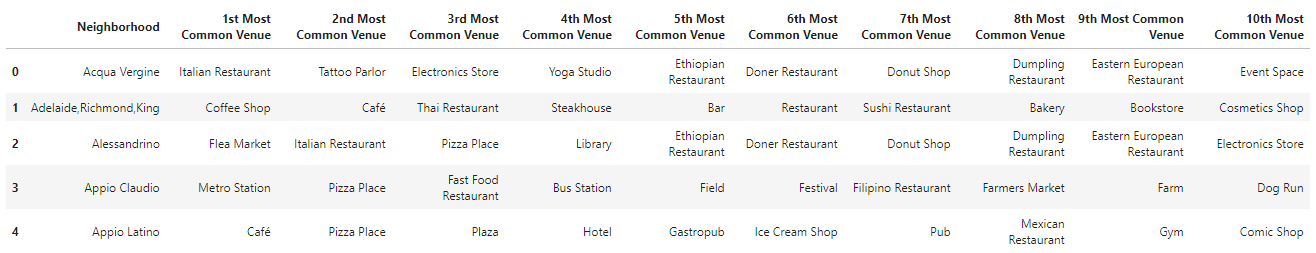

In [5]:
from IPython.display import Image
PATH = "/resources/labs/Data/"
Image(filename = PATH + "Imagine.png", unconfined=True)

Taking Appio Claudio as an example, its first common venue is the metro station while the 4th is the bus station. If a person from that area will need to relocate in Toronto, he/she will be more confortable in an area with metro station as she/he is probably used to move with public transport. The algorithm should take this into account when reccomanding a Toronto neighborhood for someone from Appio Claudio.  
The above suggests to use euclidian distance across the mean of the frequency of the occurence for venue category

Python offers ready to go functions for calculation Euclidean distance across clusters in the Kmeans cluster package. However, the goal will be to obtain a square matrix of euclidean distance across neighbourhoods. Thi can be obtained easily by using an initial number of clusters (K) equals to the number of neighbourhoods.  
During the execution, it became evident that few roman neighborhoods are so similar to each other that the algorithm can not separate them into different cluster (same distance with any other cluster).  
An example of the above consists of "Torre Angela" and "Borghesiana", two neighborhoods next to each other in Rome that can be reasonably grouped into a single neighbourhood.  
Based on the above, the following procedure has been followed:

1. K=123 (number of neighbourhoods) has been chosen as a starting K
2. If the Kmeans algorithm is not able to converge beacuse of the existance of too similar nieghborhood, the k is decrease by 1
3. The loops stops when the algorithm is able to converge.

Starting from 123, the final k has converged into 107 clusters and few Roman neighbourhoods have been grouped together 

Below, the distance matrix across clusters:

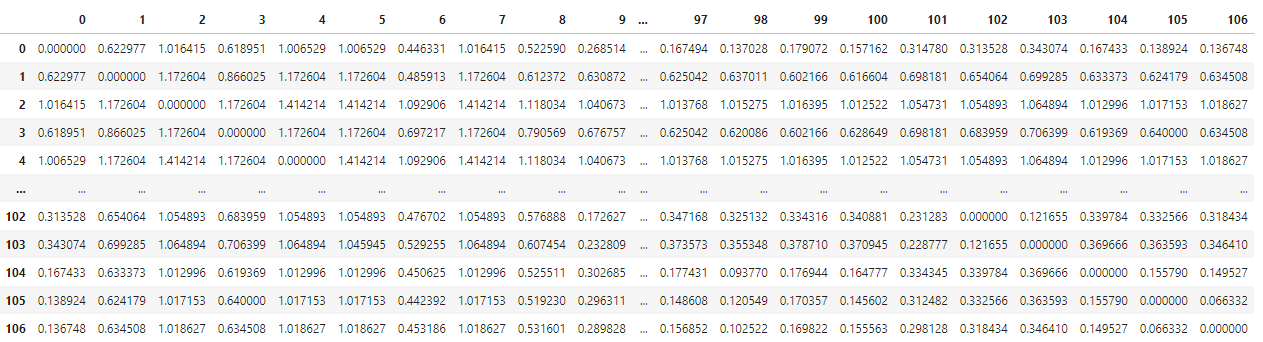

In [13]:
from IPython.display import Image
PATH = "/resources/labs/Data/"
Image(filename = PATH + "im7.png", unconfined=True)

By associating each cluster to the respective neighborhood (or small groups of neighbourhood):

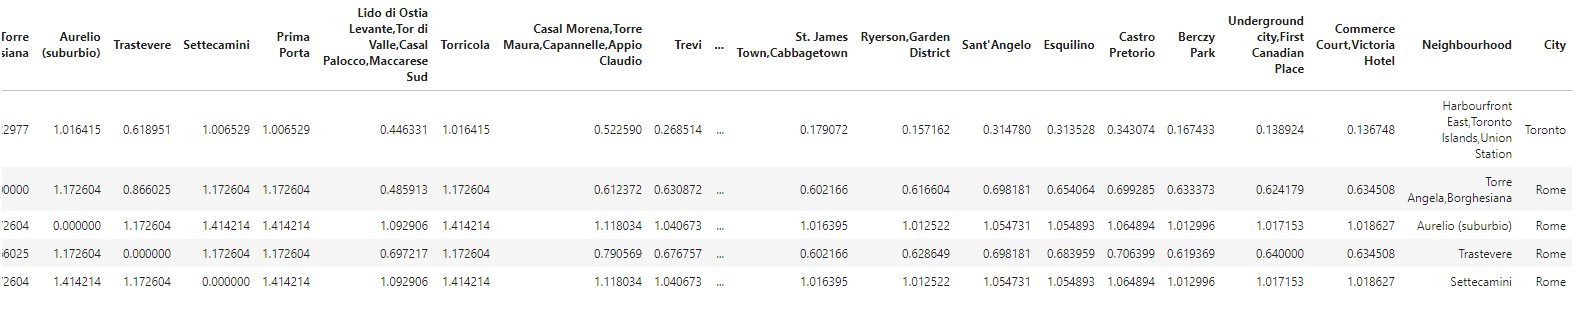

In [8]:
from IPython.display import Image
PATH = "/resources/labs/Data/"
Image(filename = PATH + "im8.png", unconfined=True)

### Results

Results are now queryable for every case.  

Taking Tuscolano as an example, the five more similar Toronto neighborhoods are:

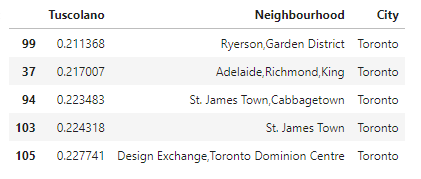

In [14]:
from IPython.display import Image
PATH = "/resources/labs/Data/"
Image(filename = PATH + "im9.png", unconfined=True)

The closest place to Tuscolano would be Ryerson,Garden District with the smallest euclidean distance

The distance has been calculated based on 100 venues, however the result became evident by looking at the top 20 most common venues across Tuscolano and Ryerson,Garden District

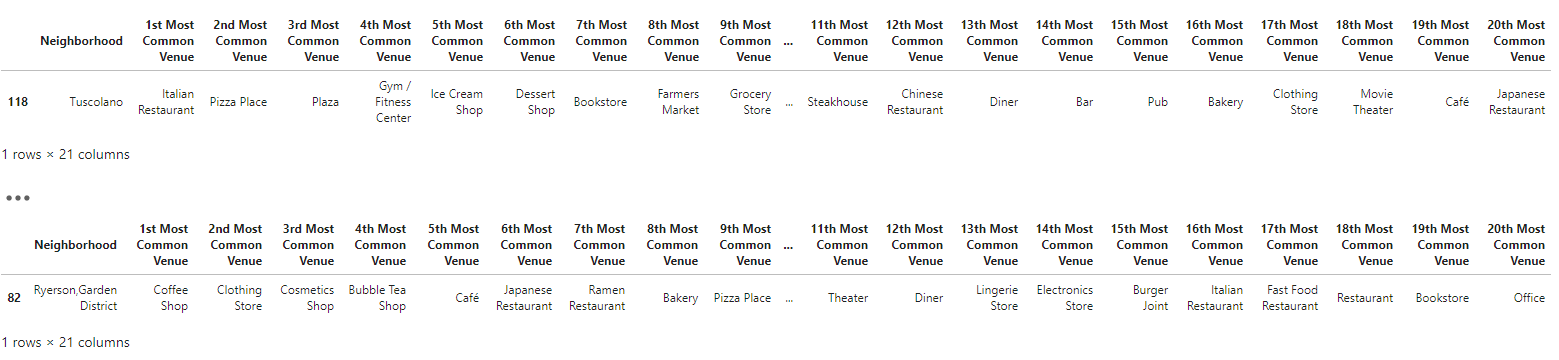

In [15]:
from IPython.display import Image
PATH = "/resources/labs/Data/"
Image(filename = PATH + "image2.png", unconfined=True)

Whoever from Tuscolano would like to move to Toronto would know that in Ryerson,Garden District he/she is likely to find a similar density of Italian Restaurant, Pizza Place, Bookstore, Diner, Bakery, Clothing Store, Caffe and Japanese Restaurant that he/she will find at home. With 8 out of 20, Tuscolano shares almost half of its top 20 most common venues ranking with Ryerson,Garden District.

Additional statics:  
Most similar couple of roman/Toronto: neighbourhoods: Monti and Design Exchange,Toronto Dominion Centre with a distance of 0.20815036178207  
Most dissimilar couple of roman/Toronto Aurelio (suburbio) and Roselawn with a distance of 1.4142135623731  
Toronto and Rome venues are similar for an average of 0.542667019235158

### Conclusion

By using Foursquare location data, Rome and Toronto geo data, the kmeans cluster algorithm and the euclidian distance, it has been possibile to create a recommendation matrix to help relocate people from Rome to Toronto (or the other way around) based on the neighbourhood of origin.

This kind of data is really easy to obtain, meaning that this analysis can be replicated for any city

The additional statistics at the end of the Results section may mean nothing per se, but they can gather meaning by comparing them with the results another recommendation matrix across a different towns (example Rome and New York). In that case, someone from Rome will know how similar is New York to Rome on average - compare to Toronto -  and its closest and farthest couple of neighbourhood.